# Exploratory Notebook

Exploring RIMES dataset and testing image processing methods

In [163]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, filters, color

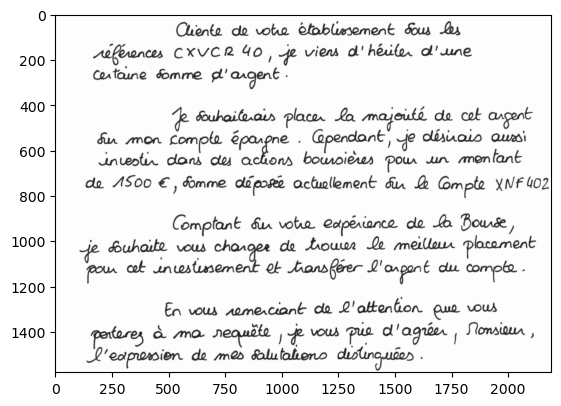

In [164]:
# Abrindo imagem qualquer
test = io.imread("RIMES/DVD3/03701_L.jpg")
assert io.imread is not None, "Falha ao ler imagem, cheque se os diretórios existem"

plt.imshow(test, cmap=plt.cm.gray)
plt.show()

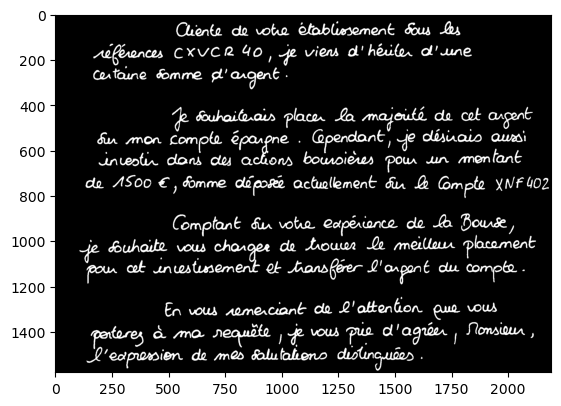

In [165]:
# Binarizando imagem
th, test_bin = cv.threshold(test, 0, 1.0, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(test_bin, cmap=plt.cm.gray)
plt.show()

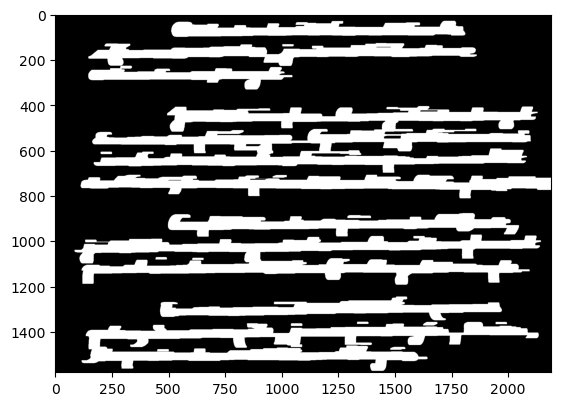

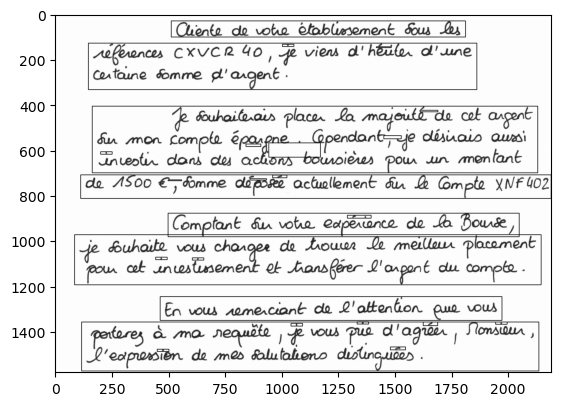

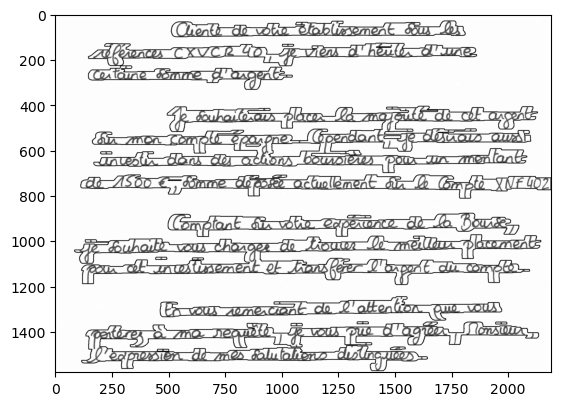

In [166]:
# Criando Contornos para Linhas
n        = 99
ero_krnl = np.ones((1, 55))
kernel   = np.ones((3, n), np.uint8)
test_dil = cv.erode(cv.dilate(test_bin, kernel), ero_krnl)
plt.imshow(test_dil, cmap=plt.cm.gray)
plt.show()

(contours, hierarchy) = cv.findContours(test_dil.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv.boundingRect(ctr)[1])

test_cp = test.copy()
for ctr in sorted_contours_lines:
    x,y,w,h = cv.boundingRect(ctr)
    cv.rectangle(test_cp, (x,y), (x+w, y+h), (40, 100, 250), 2)
plt.imshow(test_cp, cmap=plt.cm.gray)
plt.show()
# Draw contours on "original" image
test_cp = test.copy()
cv.drawContours(image=test_cp, contours=contours, contourIdx=-1, \
                color=(0, 0, 255), thickness=2, lineType=cv.LINE_AA)

plt.imshow(test_cp, cmap=plt.cm.gray)
plt.show()

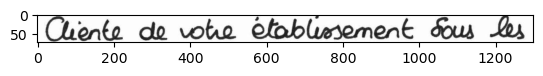

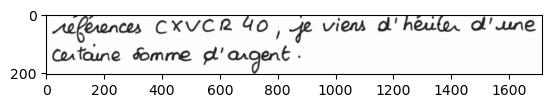

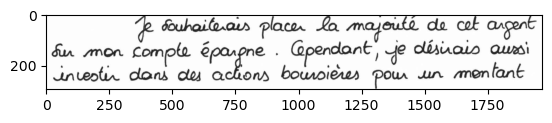

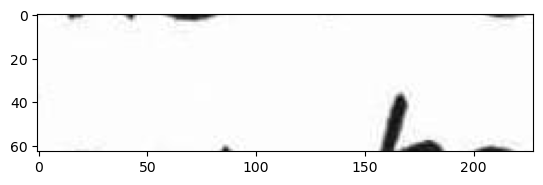

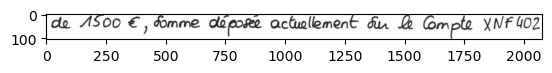

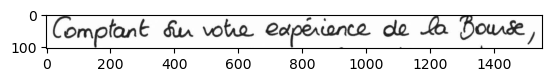

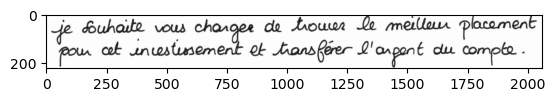

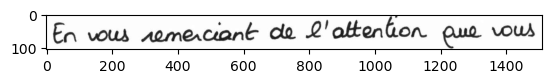

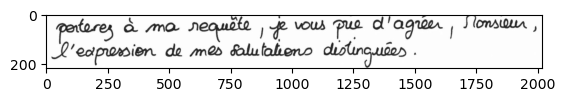

In [167]:
test_cp = test.copy()
for line in sorted_contours_lines:
    if cv.contourArea(line) < 1200:
        continue
    x,y,w,h = cv.boundingRect(line)
    plt.imshow(test[y:y+h, x:x+w], cmap=plt.cm.gray)
    plt.show()

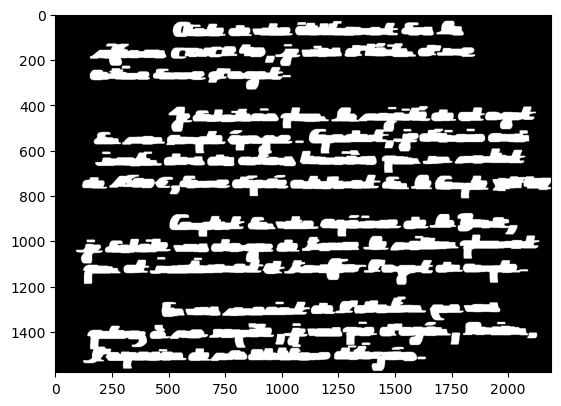

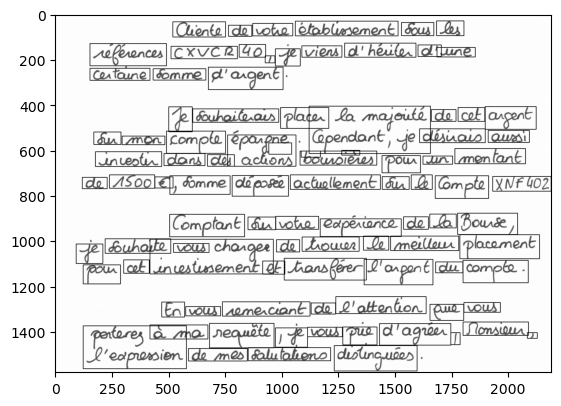

In [173]:
# Criando Contornos para Palavras
n         = 31
kernel    = np.ones((3, n), np.uint8)
test_dil2 = cv.dilate(test_bin, kernel, iterations=1)
plt.imshow(test_dil2, cmap=plt.cm.gray)
plt.show()

test_cp = test.copy()
words   = []

for line in sorted_contours_lines:
    if cv.contourArea(line) < 1200:
        continue
    # roi of each line
    x, y, w, h = cv.boundingRect(line)
    roi_line = test_dil2[y:y+h, x:x+w]

    # draw contours on each word
    (cnt, hierarchy) = cv.findContours(roi_line.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv.boundingRect(cntr)[0])

    for word in sorted_contour_words:
        if cv.contourArea(word) < 400:
            continue

        x2, y2, w2, h2 = cv.boundingRect(word)
        if h2<20:
            continue
        words.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv.rectangle(test_cp, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (0,0,255),2)

#cv.drawContours(image=test_cp, contours=contours, contourIdx=-1, \
#                color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)

plt.imshow(test_cp, cmap=plt.cm.gray)
plt.show()

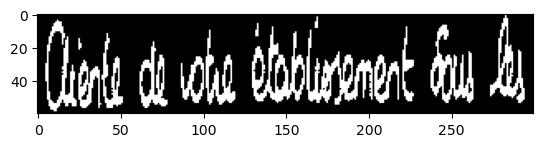

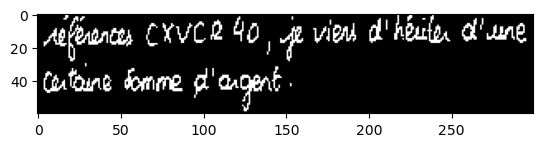

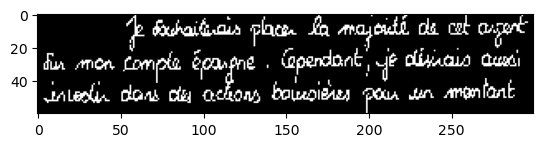

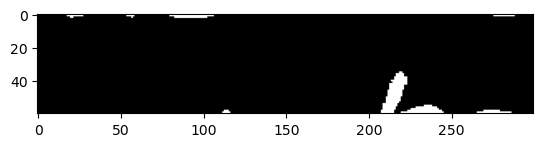

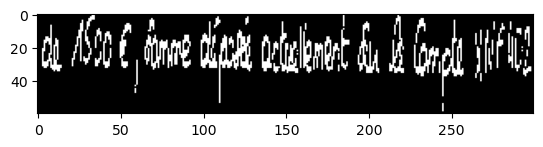

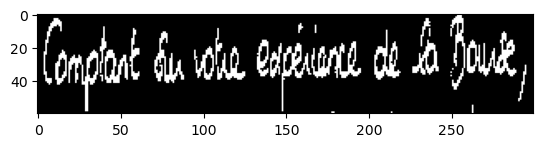

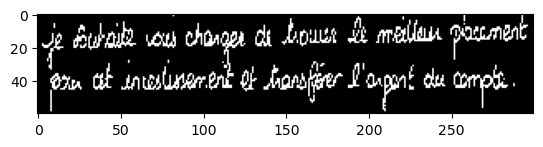

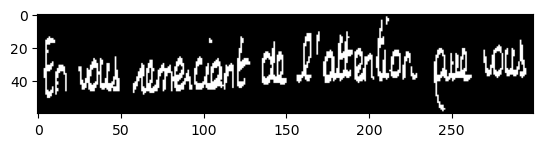

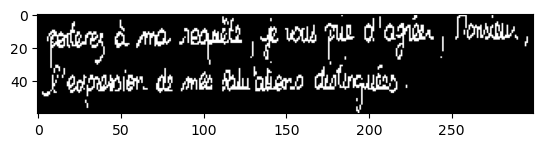

In [169]:
counter=0
for word in words[:10]:
    roi    = test_bin[word[1]:word[3], word[0]:word[2]]
    roi    = cv.resize(roi, (300, 60))
    plt.imshow(roi, cmap=plt.cm.gray)
    plt.show()
    cv.imwrite(f"balls{counter}.jpg", roi)
    counter = counter+1